# Preliminary Data Analysis

In [7]:
import json
import numpy as np
import pandas as pd

data_file = '/Users/casperruegg/Documents/python_projects/ML_2024/data/Sarcasm_Headlines_Dataset_v2.json'

def parse_json(fname):
    data = []
    with open(fname, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

data = parse_json(data_file)

df = pd.DataFrame(data)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Check the distribution of data

In [8]:
sarcastic_count = df.is_sarcastic.value_counts()
sarcastic_count

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64

## Plotly graphs of headline length

In [27]:
import plotly.graph_objs as go
from plotly.offline import plot

df['headline_length'] = df['headline'].apply(len)
df['word count'] = df['headline'].apply(lambda x: len(x.split()))

average_length = df['headline_length'].mean()
average_word_count = df['word count'].mean()

print(f'Average length of headlines: {average_length:.2f}')
print(f'Average word count of headlines: {average_word_count:.2f}')

# make plot of average headline lenght for sarcastic and non-sarcastic headlines

sarcastic = df[df['is_sarcastic'] == 1]
non_sarcastic = df[df['is_sarcastic'] == 0]

# Determine the global minimum and maximum headline lengths to set consistent bins
global_min = min(min(sarcastic['headline_length']), min(non_sarcastic['headline_length']))
global_max = max(max(sarcastic['headline_length']), max(non_sarcastic['headline_length']))

# Define the bin size and edges
bin_size = (global_max - global_min) / 200
bin_edges = [global_min + x * bin_size for x in range(21)]

sarcastic_histogram = go.Histogram(
    x=sarcastic['headline_length'],
    opacity=0.5,
    name='Sarcastic',
    xbins=dict(
        start=global_min,
        end=global_max,
        size=bin_size
    )
)

non_sarcastic_histogram = go.Histogram(
    x=non_sarcastic['headline_length'],
    opacity=0.5,
    name='Non-sarcastic',
    xbins=dict(
        start=global_min,
        end=global_max,
        size=bin_size
    )
)

data = [sarcastic_histogram, non_sarcastic_histogram]

layout = go.Layout(
    title='Headline Length',
    xaxis=dict(title='Headline Length'),
    yaxis=dict(title='Count'),
    barmode='overlay',
    legend=dict(x=1, y=1, xanchor='right', yanchor='top')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Average length of headlines: 62.31
Average word count of headlines: 10.05


## Word cloud

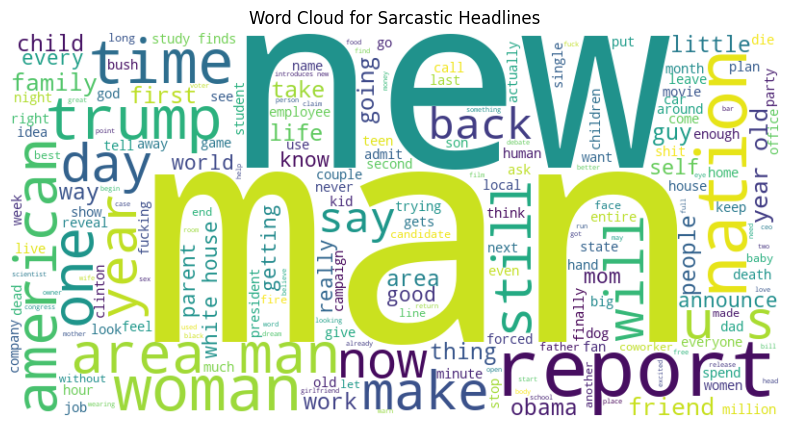

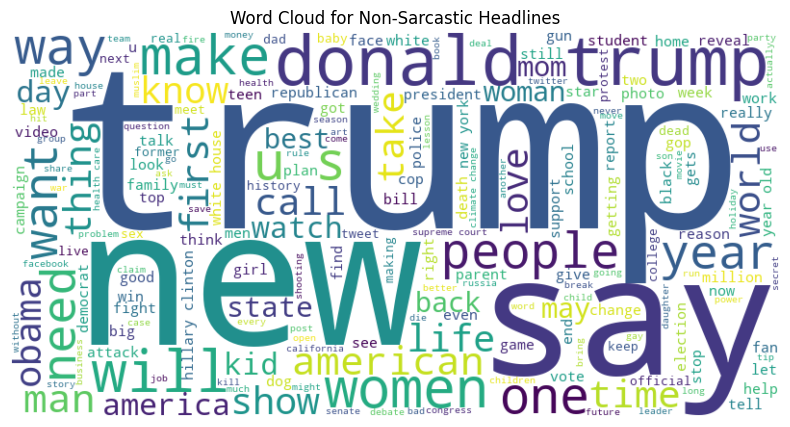

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Word Cloud for Sarcastic Headlines
sarcastic_headlines = ' '.join(df[df['is_sarcastic'] == 1]['headline'])
wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(sarcastic_headlines)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sarcastic Headlines')
plt.show()

# Word Cloud for Non-Sarcastic Headlines
non_sarcastic_headlines = ' '.join(df[df['is_sarcastic'] == 0]['headline'])
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(non_sarcastic_headlines)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Sarcastic Headlines')
plt.show()